In [4]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("../results/tables/deep_models_results.csv")
figures_dir = "../results/figures/deep_learning"

In [6]:
# Chuyển đổi dữ liệu sang dạng dài (long format) để dễ vẽ bằng Seaborn
df_melted = pd.melt(df, id_vars=['Model'], value_vars=['Test_Accuracy', 'Val_Accuracy'],
                    var_name='Dataset', value_name='Accuracy')

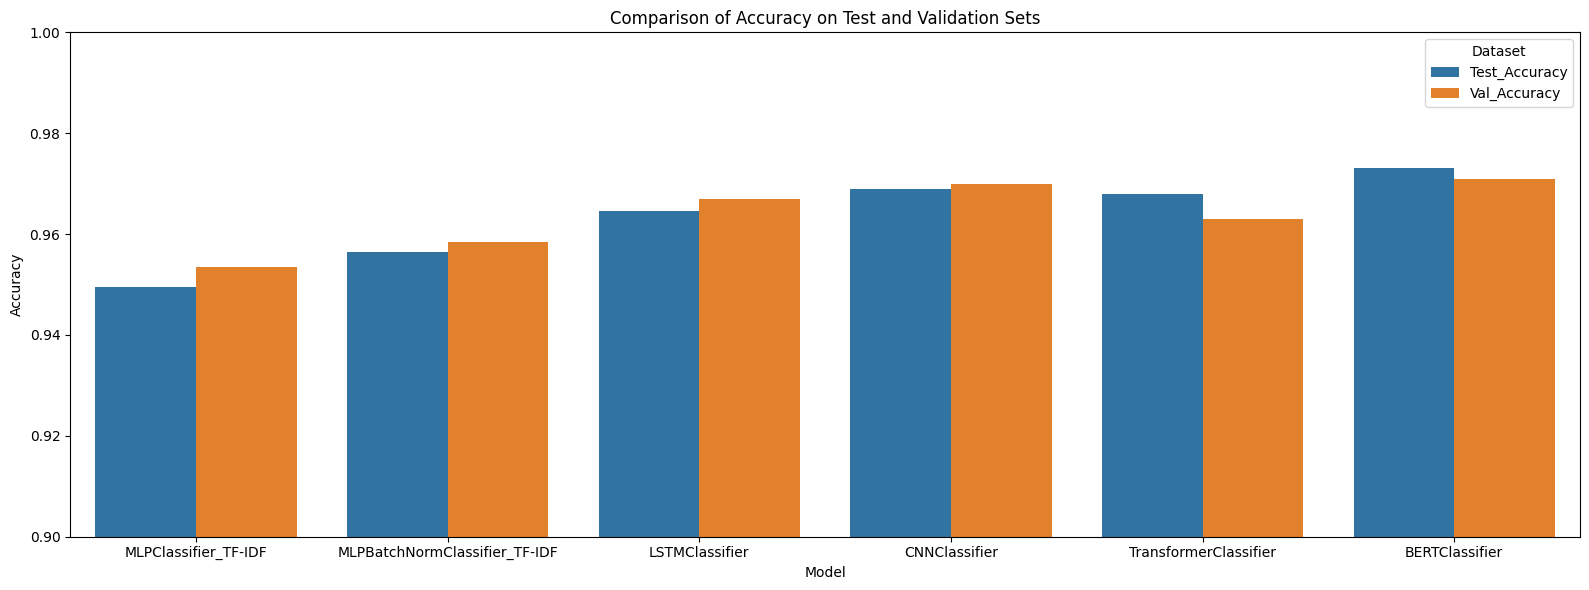

In [12]:
# Vẽ bar plot
fig, ax = plt.subplots(figsize=(16, 6))  # Tạo figure và axes một cách riêng biệt
sns.barplot(x='Model', y='Accuracy', hue='Dataset', data=df_melted, ax=ax)  # Truyền đối tượng axes cho Seaborn
ax.set_title('Comparison of Accuracy on Test and Validation Sets')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Model')
ax.set_ylim(0.9, 1.0) 
ax.legend(title='Dataset')
plt.tight_layout()
fig.savefig(os.path.join(figures_dir, "comparison_of_accuracy.png"))
plt.show()

In [8]:
# Đường dẫn đến các file CSV
dl_results_path = "../results/tables/deep_models_results.csv"
ml_results_path = "../results/tables/baseline_results.csv"

In [13]:
# Đọc dữ liệu deep learning từ file CSV
df_dl = pd.read_csv(dl_results_path)

# Đổi tên cột
df_dl = df_dl.rename(columns={
    'Test_Accuracy': 'Accuracy',
    'Test_Precision': 'Precision',
    'Test_Recall': 'Recall',
    'Test_F1-Score': 'F1-Score'
}).drop(columns=['Val_Accuracy', 'Val_Precision', 'Val_Recall', 'Val_F1-Score'], errors='ignore') # Thêm errors='ignore'

# Thêm cột 'Type'
df_dl['Type'] = 'DeepLearning'

# Đọc dữ liệu machine learning từ file CSV
df_ml = pd.read_csv(ml_results_path)

# Kết hợp cột 'Model' và 'Type' của df_ml
df_ml['Model'] = df_ml['Model'] + ' - ' + df_ml['Type']
df_ml = df_ml.drop('Type', axis=1)

# Đổi tên cột Model của df_dl để thống nhất
df_dl['Model'] = df_dl['Model'] + ' - ' + df_dl['Type']
df_dl = df_dl.drop('Type', axis=1)

# Gộp hai DataFrame
df_combined = pd.concat([df_dl, df_ml], ignore_index=True)

df_combined

,Model,Accuracy,Precision,Recall,F1-Score
0,MLPClassifier_TF-IDF - DeepLearning,0.9495,0.950050,0.9495,0.949678
1,MLPBatchNormClassifier_TF-IDF - DeepLearning,0.9565,0.958108,0.9565,0.956867
2,LSTMClassifier - DeepLearning,0.9645,0.963990,0.9645,0.964047
3,CNNClassifier - DeepLearning,0.9690,0.971737,0.9690,0.969490
4,TransformerClassifier - DeepLearning,0.9680,0.972809,0.9680,0.968127
5,BERTClassifier - DeepLearning,0.9730,0.977299,0.9730,0.973003
6,Naive Bayes - Baseline,0.9005,0.899447,0.9005,0.899096
7,Naive Bayes - GridSearchCV,0.9180,0.919758,0.9180,0.917250
8,Random Forest - Baseline,0.9435,0.943741,0.9435,0.943536
9,Random Forest - GridSearchCV,0.9455,0.945679,0.9455,0.945498


In [10]:
# Xác định danh sách tên mô hình
model_names = df_combined['Model'].unique()

# Tạo danh sách màu thủ công
colors = ['#1f77b4'] * 2  # 2 cột đầu cùng màu (màu xanh dương mặc định)
colors.extend(['#c71585'] * 4)
colors.extend(['#ff7f0e', '#ff7f0e', '#2ca02c', '#2ca02c', '#d62728', '#d62728', '#9467bd', '#9467bd'])  # 10 cột sau, mỗi cặp một màu

# Tạo một dictionary ánh xạ tên mô hình đến màu sắc
color_map = dict(zip(model_names, colors))

C:\Users\DO XUAN CHIEN\AppData\Local\Temp\ipykernel_27496\1043568177.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_combined,palette=color_map)


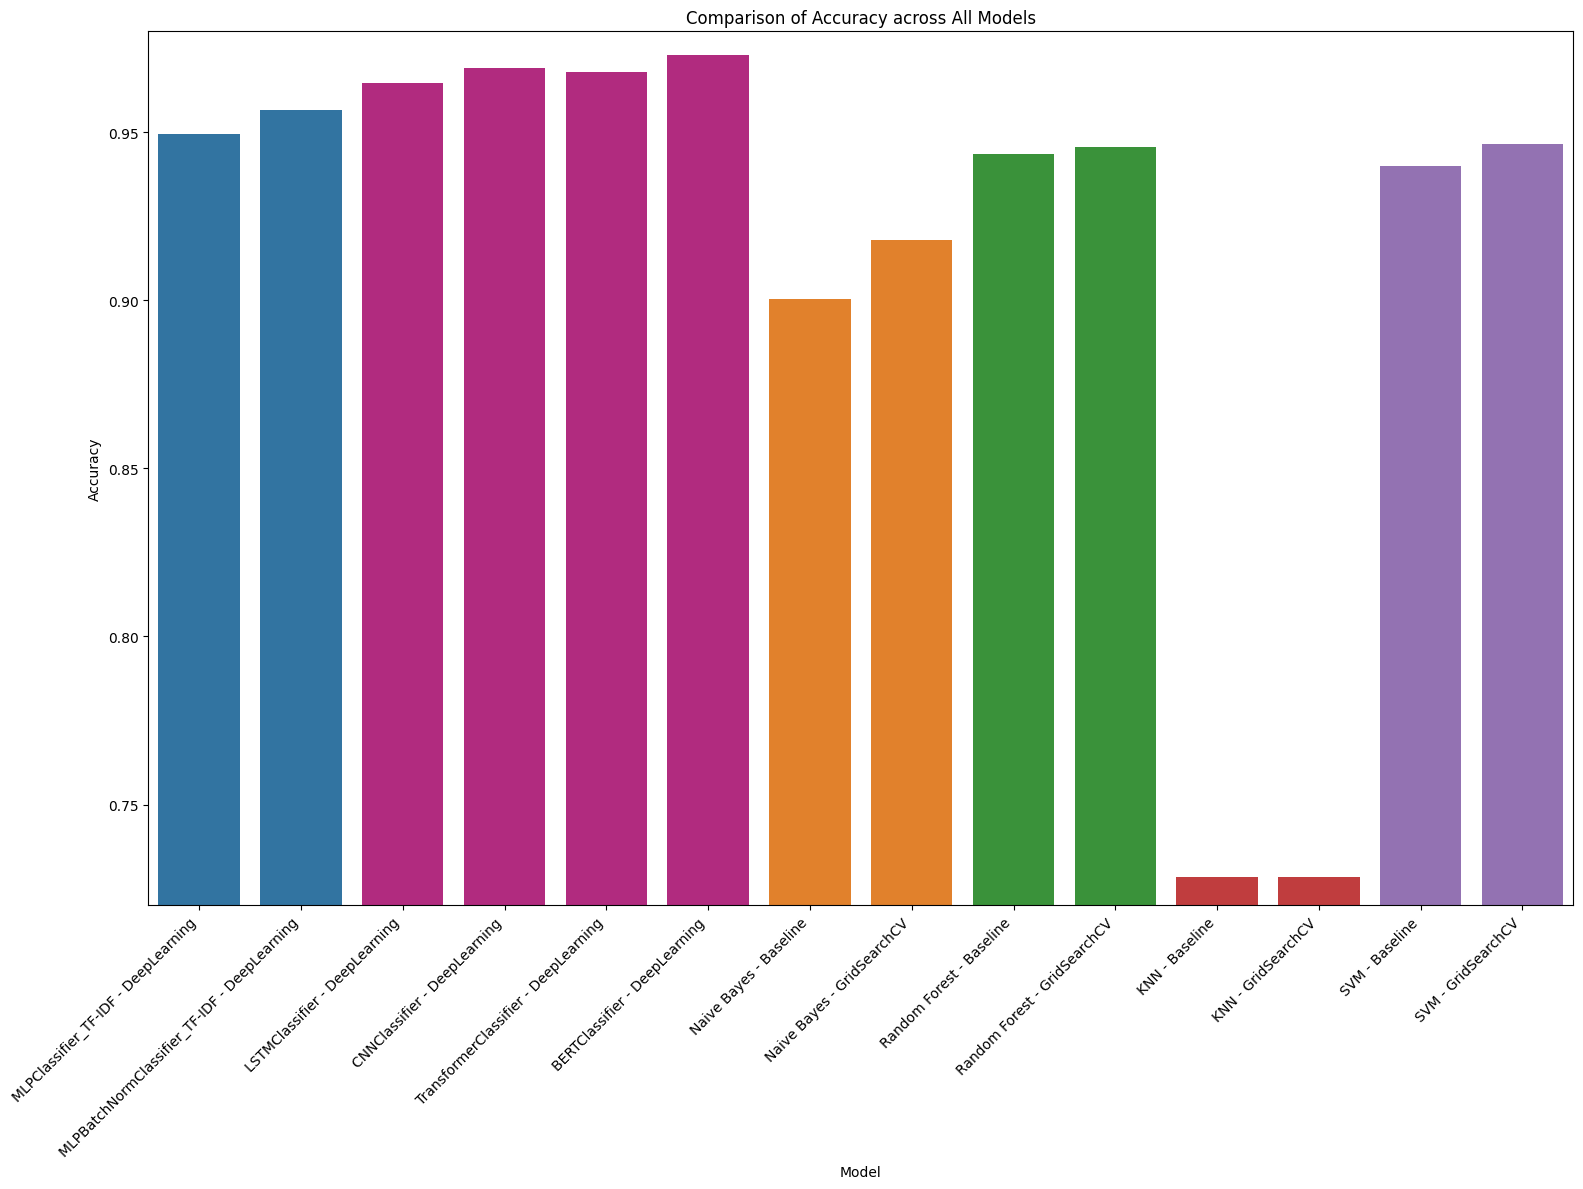

In [11]:
# Vẽ bar plot so sánh Accuracy giữa các mô hình
plt.figure(figsize=(16, 12))
sns.barplot(x='Model', y='Accuracy', data=df_combined,palette=color_map)
plt.title('Comparison of Accuracy across All Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.72, 0.98)
plt.tight_layout()
plt.savefig(os.path.join(figures_dir, "all_models_accuracy.png"))
plt.show()